In [149]:
import pandas as pkg_pandas
import numpy as pkg_numpy
from matplotlib import pyplot as pkg_plot
from sklearn import linear_model as pkg_linear_model
from sklearn import model_selection as pkg_model_selection

In [150]:
baseline_df = pkg_pandas.read_csv("../data/cbex-mvlr-car-prices-train.csv")
baseline_df

,mileage,age,price
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


#### Graph - Age (x-axis) vs. Price (y-axis)

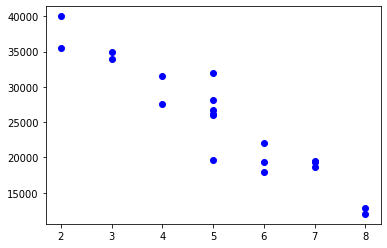

In [151]:
%matplotlib inline
pkg_plot.xlabel='age'
pkg_plot.ylabel='price'
pkg_plot.scatter(baseline_df.age, baseline_df.price, color='blue', marker='o')

#### Graph - Mileage (x-axis) vs. Price (y-axis)

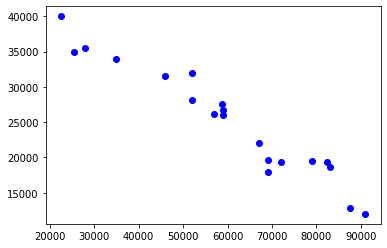

In [152]:
%matplotlib inline
pkg_plot.xlabel='mileage'
pkg_plot.ylabel='price'
pkg_plot.scatter(baseline_df.mileage, baseline_df.price, color='blue', marker='o')

In [153]:
baseline_inputs = baseline_df[['mileage', 'age']]
baseline_inputs

,mileage,age
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [154]:
baseline_outputs = baseline_df.price
baseline_outputs

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: price, dtype: int64

In [155]:
train_inputs, test_inputs, train_outputs, test_outputs = \
    pkg_model_selection.train_test_split(baseline_inputs, baseline_outputs, test_size=0.33, random_state = 20)
train_inputs.head(5)

,mileage,age
12,59000,5
19,52000,5
5,59000,5
8,91000,8
18,87600,8


In [156]:
print("=== Baseline Split - Train and Test ===")
print("Lengths: Baseline = {}, Train = {}, Test = {}".format(len(baseline_inputs), len(train_inputs), len(test_inputs)))

=== Baseline Split - Train and Test ===
Lengths: Baseline = 20, Train = 13, Test = 7


In [157]:
model = pkg_linear_model.LinearRegression()
model.fit(X=train_inputs, y=train_outputs)
model.coef_, model.intercept_

(array([-3.12689067e-01, -9.44851575e+02]), 48656.96518976552)

In [158]:
model_score = model.score(X=test_inputs, y=test_outputs)
model_score

0.8976441370890735

In [159]:
actual_outputs = pkg_numpy.array(test_outputs)
predicted_outputs = model.predict(test_inputs)

print ("=== Result ===")
print ("Actual    Outputs = {}".format(actual_outputs))
print ("Predicted Outputs = {}".format(predicted_outputs))

=== Result ===
Actual    Outputs = [35500 27500 18700 31500 34000 19400 19700]
Predicted Outputs = [38011.96816216 26497.69552812 16089.81159908 30493.86180518
 34878.29311779 16261.79058597 22357.16168782]
